In [315]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [316]:
# Read the csv file into a pandas DataFrame

data = pd.read_csv('datasets\clean_data\mining_gender.csv')
data.head()

,Date,Sex,Location,Employed full-time ('000),Employed part-time ('000)
0,2002,Males,NSW,1.391635,0.000000
1,2002,Males,NSW,13.439175,0.000000
2,2002,Males,VIC,1.198881,0.354086
3,2002,Males,VIC,2.776364,0.000000
4,2002,Males,QLD,3.029516,0.266453


In [317]:
X = data[["Date", "Sex","Employed full-time ('000)","Employed part-time ('000)"]]
y = data["Employed part-time ('000)"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1783, 4) (1783, 1)


In [318]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["Sex"])
data_binary_encoded.head()

,Date,Employed full-time ('000),Employed part-time ('000),Sex_Females,Sex_Males
0,2002,1.391635,0.000000,0,1
1,2002,13.439175,0.000000,0,1
2,2002,1.198881,0.354086,0,1
3,2002,2.776364,0.000000,0,1
4,2002,3.029516,0.266453,0,1


In [319]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.head(500)

,Date,Employed full-time ('000),Employed part-time ('000),Sex_Females,Sex_Males
0,2002,1.391635,0.000000,0,1
1,2002,13.439175,0.000000,0,1
2,2002,1.198881,0.354086,0,1
3,2002,2.776364,0.000000,0,1
4,2002,3.029516,0.266453,0,1
...,...,...,...,...,...
495,2007,4.940923,0.360216,0,1
496,2007,3.949518,0.000000,0,1
497,2007,27.420418,0.410044,0,1
498,2007,2.777013,0.295503,0,1


In [320]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,Date,Employed full-time ('000),Employed part-time ('000),Sex_Females,Sex_Males
266,2004,0.638562,0.782519,1,0
148,2003,0.570906,0.000000,1,0
575,2008,4.795270,0.000000,0,1
1239,2014,2.045820,0.574396,1,0
888,2011,4.382169,0.000000,1,0


In [321]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [322]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

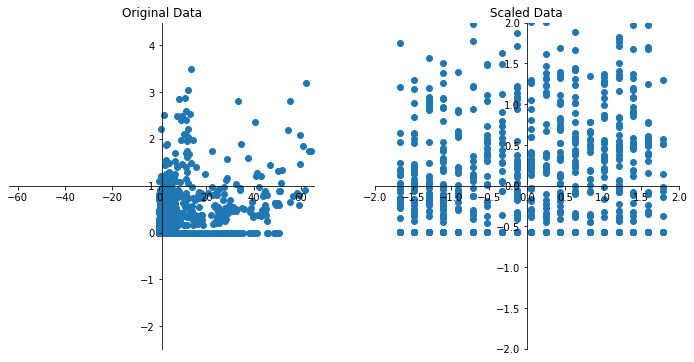

In [323]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Employed full-time ('000)"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Employed full-time ('000)"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [324]:
X = pd.get_dummies(data[["Date", "Sex","Employed full-time ('000)"]])
y = data["Employed part-time ('000)"].values.reshape(-1, 1)
X.head()

,Date,Employed full-time ('000),Sex_Females,Sex_Males
0,2002,1.391635,0,1
1,2002,13.439175,0,1
2,2002,1.198881,0,1
3,2002,2.776364,0,1
4,2002,3.029516,0,1


In [325]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [326]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

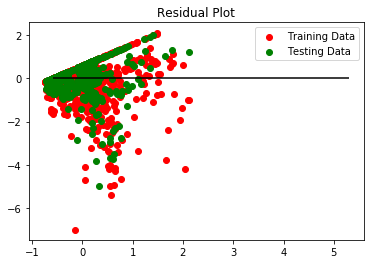

In [327]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="red", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="green", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [328]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7101175924414315, R2: 0.1250186778450536
